<a href="https://colab.research.google.com/github/athaabiyyu/Pembelajaran_Mesin/blob/main/MingguKe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM 1 - START**

In [1]:
# Persiapan Data
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data dari file CSV
data = pd.read_csv('/content/sample_data/insurance.csv')

In [3]:
# PEMAHAMAN TERHADAP DATA

# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "None of [Index(['Time on App', 'Yearly Amount Spent'], dtype='object')] are in the [columns]"

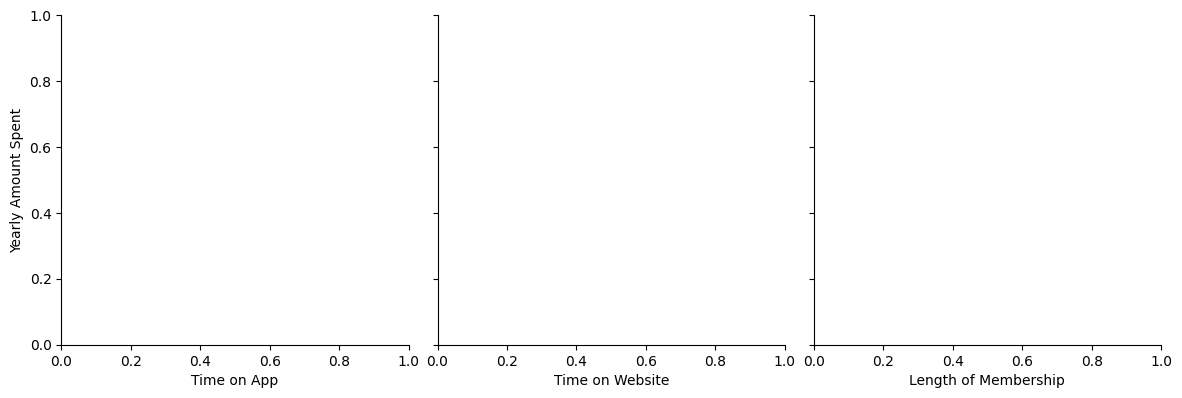

In [8]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library Matplotlib dan Seaborn untuk visualisasi data
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

**TUGAS PRAKTIKUM - START**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Jawaban :
Variabel bebas (fitur):
- age: Usia
- sex: Jenis kelamin
- bmi: Body Mass Index (Indeks Massa Tubuh)
- children: Jumlah anak
- smoker: Apakah orang tersebut merokok
- region: Wilayah geografis (southwest, southeast, northwest, northeast)

Variabel target:
- charges: Biaya medis personal (ini adalah variabel yang ingin kita prediksi)

In [ ]:
# 2. Bagi dataset menjadi data latih (train)
# dan data uji (test) dengan proporsi yang sesuai.

# Jawab :

import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset
data_asuransi = pd.read_csv('/content/sample_data/insurance.csv')

# Memisahkan fitur (semua kolom kecuali 'charges') dan target ('charges')
fitur = data_asuransi.drop('charges', axis=1)
biaya_medis = data_asuransi['charges']

# 2. Membagi dataset menjadi data latih (80%) dan data uji (20%)
fitur_latih, fitur_uji, target_latih, target_uji = train_test_split(fitur, biaya_medis, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan uji
print("Ukuran data latih:", fitur_latih.shape, target_latih.shape)
print("Ukuran data uji:", fitur_uji.shape, target_uji.shape)


Ukuran data latih: (1070, 6) (1070,)
Ukuran data uji: (268, 6) (268,)


In [ ]:
# 3. Lakukan feature scaling jika diperlukan.

# Jawab :
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membaca dataset
data_asuransi = pd.read_csv('/content/sample_data/insurance.csv')

# Memisahkan fitur (semua kolom kecuali 'charges') dan target ('charges')
fitur = data_asuransi.drop('charges', axis=1)
biaya_medis = data_asuransi['charges']

# Mengkodekan variabel kategorikal menjadi numerik
fitur_encoded = pd.get_dummies(fitur, drop_first=True)

# Membagi dataset menjadi data latih (80%) dan uji (20%)
fitur_latih, fitur_uji, biaya_latih, biaya_uji = train_test_split(fitur_encoded, biaya_medis, test_size=0.2, random_state=42)

# Melakukan feature scaling menggunakan StandardScaler
scaler = StandardScaler()
fitur_latih_scaled = scaler.fit_transform(fitur_latih)
fitur_uji_scaled = scaler.transform(fitur_uji)

# Membuat model regresi linier
model_regresi = LinearRegression()

# Melatih model pada data latih
model_regresi.fit(fitur_latih_scaled, biaya_latih)

# Melakukan prediksi pada data uji
prediksi_biaya = model_regresi.predict(fitur_uji_scaled)

# Evaluasi model
mse = mean_squared_error(biaya_uji, prediksi_biaya)
mae = mean_absolute_error(biaya_uji, prediksi_biaya)
r2 = r2_score(biaya_uji, prediksi_biaya)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753651
R-squared: 0.7835929767120722


In [ ]:
#  4. Buat model multiple linear regression menggunakan Scikit-Learn

# Jawab :

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memuat data asuransi
data_asuransi = pd.read_csv('/content/sample_data/insurance.csv')

# Mengonversi variabel kategorikal menjadi numerik menggunakan pd.get_dummies
data_asuransi_encoded = pd.get_dummies(data_asuransi, drop_first=True)

# Memisahkan fitur (X) dan target (y)
fitur = data_asuransi_encoded.drop('charges', axis=1)
biaya_medis = data_asuransi_encoded['charges']

# Membagi data menjadi data latih (80%) dan uji (20%)
fitur_latih, fitur_uji, biaya_latih, biaya_uji = train_test_split(fitur, biaya_medis, test_size=0.2, random_state=42)

# Membuat model regresi linier
model_regresi = LinearRegression()

# Melatih model menggunakan data latih
model_regresi.fit(fitur_latih, biaya_latih)

# Menampilkan koefisien model regresi untuk setiap fitur
koefisien = pd.DataFrame(model_regresi.coef_, fitur.columns, columns=['Koefisien'])
print(koefisien)

# Menampilkan intersep dari model regresi
print(f'Intercept: {model_regresi.intercept_}')

# Output model
print("Model regresi linier berhasil dilatih.")


                     Koefisien
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354
Intercept: -11931.21905032666
Model regresi linier berhasil dilatih.


In [ ]:
#  5. Latih model pada data latih dan lakukan prediksi pada data uji.

# Jawab :

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Memuat data asuransi
data_asuransi = pd.read_csv('/content/sample_data/insurance.csv')

# Mengonversi variabel kategorikal menjadi numerik
data_asuransi_encoded = pd.get_dummies(data_asuransi, drop_first=True)

# Memisahkan fitur (X) dan target (y)
fitur = data_asuransi_encoded.drop('charges', axis=1)
biaya_medis = data_asuransi_encoded['charges']

# Membagi data menjadi data latih (80%) dan data uji (20%)
fitur_latih, fitur_uji, biaya_latih, biaya_uji = train_test_split(fitur, biaya_medis, test_size=0.2, random_state=42)

# Membuat model regresi linier
model_regresi = LinearRegression()

# Melatih model menggunakan data latih
model_regresi.fit(fitur_latih, biaya_latih)

# Melakukan prediksi pada data uji
prediksi_biaya = model_regresi.predict(fitur_uji)

# Menghitung metrik evaluasi
mae = mean_absolute_error(biaya_uji, prediksi_biaya)
r2 = r2_score(biaya_uji, prediksi_biaya)

# Menampilkan hasil evaluasi
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error: 4181.19447375365
R² Score: 0.7835929767120724


In [ ]:
#  6. Evaluasi model dengan menghitung metrik seperti R-squared,
# MSE, dan MAE. Tampilkan hasil evaluasi.

# Jawab :

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Memuat data asuransi
data_asuransi = pd.read_csv('/content/sample_data/insurance.csv')

# Memisahkan fitur (X) dan target (y)
fitur = data_asuransi.drop('charges', axis=1)
biaya_medis = data_asuransi['charges']

# Mengonversi variabel kategorikal menjadi numerik
fitur_encoded = pd.get_dummies(fitur, drop_first=True)

# Membagi data menjadi data latih (80%) dan data uji (20%)
fitur_latih, fitur_uji, biaya_latih, biaya_uji = train_test_split(fitur_encoded, biaya_medis, test_size=0.2, random_state=42)

# Melakukan feature scaling menggunakan StandardScaler
scaler = StandardScaler()
fitur_latih_scaled = scaler.fit_transform(fitur_latih)
fitur_uji_scaled = scaler.transform(fitur_uji)

# Membuat model regresi linier
model_regresi = LinearRegression()

# Melatih model menggunakan data latih
model_regresi.fit(fitur_latih_scaled, biaya_latih)

# Melakukan prediksi pada data uji
prediksi_biaya = model_regresi.predict(fitur_uji_scaled)

# Menghitung metrik evaluasi
mse = mean_squared_error(biaya_uji, prediksi_biaya)
mae = mean_absolute_error(biaya_uji, prediksi_biaya)
r2 = r2_score(biaya_uji, prediksi_biaya)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
R-squared: 0.78


**TUGAS PRAKTIKUM - END**